# Miliverse Analytics

##Background Information

All data sourced from Miliverse Admin page

All data collected from Miliverse launch to July 1

For access to data or for clarification on analysis tools/ findings, contact Sanjeev Narasimhan at snarasimhan421@gmail.com

## Setup

In [ ]:
# all imports
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,\
f1_score, recall_score, RocCurveDisplay, precision_score, roc_auc_score

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

from numpy.lib.function_base import kaiser

import seaborn as sn

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

In [ ]:
# allow for import of data
from google.colab import files
uploaded = files.upload()

Saving Miliverse Analytics - Active Players (Master Data).csv to Miliverse Analytics - Active Players (Master Data).csv
Saving Miliverse Analytics - Weapon Transactions.csv to Miliverse Analytics - Weapon Transactions.csv
Saving Miliverse Analytics - Land Transactions.csv to Miliverse Analytics - Land Transactions.csv
Saving Miliverse Analytics - Total Player Base.csv to Miliverse Analytics - Total Player Base.csv


In [ ]:
# read in data into a df
import io
Miliverse_Players_DF = pd.read_csv(io.BytesIO(uploaded['Miliverse Analytics - Total Player Base.csv']))
Miliverse_Players_DF.head()

In [ ]:
# read in data into a df
import io
Miliverse_Land_DF = pd.read_csv(io.BytesIO(uploaded['Miliverse Analytics - Land Transactions.csv']))
Miliverse_Land_DF.head()

In [ ]:
# read in data into a df
import io
Miliverse_Weapons_DF = pd.read_csv(io.BytesIO(uploaded['Miliverse Analytics - Weapon Transactions.csv']))
Miliverse_Weapons_DF.head()

In [ ]:
# read in data into a df
import io
Miliverse_Active_Players_DF = pd.read_csv(io.BytesIO(uploaded['Miliverse Analytics - Active Players (Master Data).csv']))
Miliverse_Active_Players_DF.head()

## Cleaning

In [ ]:
# drop null values and reset the index
print(Miliverse_Players_DF.isnull().sum())
Miliverse_Players_DF = Miliverse_Players_DF.dropna()
Miliverse_Players_DF = Miliverse_Players_DF.reset_index()

Username                       0
Email                         18
Active Status                  0
Time of Acc Creation           0
Acc Creation (Year/ Month)     0
dtype: int64


In [ ]:
# drop null values and reset the index
print(Miliverse_Land_DF.isnull().sum())
Miliverse_Land_DF = Miliverse_Land_DF.dropna()
Miliverse_Land_DF = Miliverse_Land_DF.reset_index()

Buyer                                0
Seller                               0
Transaction Type                     0
Land ID                              0
Cost                                 0
Time of Transaction                  0
Num Tiles                            0
Time of Transaction (year/ month)    0
dtype: int64


In [ ]:
# drop null values and reset the index
print(Miliverse_Weapons_DF.isnull().sum())
Miliverse_Weapons_DF = Miliverse_Weapons_DF.dropna()
Miliverse_Weapons_DF = Miliverse_Weapons_DF.reset_index()

Buyer                  0
Seller                 0
Transaction Type       0
Land ID                0
Cost                   0
Time of Transaction    0
Num Weapons            0
dtype: int64


In [ ]:
# drop null values and reset the index
print(Miliverse_Active_Players_DF.isnull().sum())
Miliverse_Active_Players_DF = Miliverse_Active_Players_DF.dropna()
Miliverse_Active_Players_DF = Miliverse_Active_Players_DF.reset_index()

Buyer                                             1
Email                                             3
Time of Acc Creation                              1
Time of Transaction                               1
Acc Creation (Year/ Month)                        1
Acc Creation (float)                              1
Time of  Most Recent Transaction (year/ month)    1
Time of  Most Recent Transaction (float)          1
Num Tiles Held                                    1
Milipoints Held                                   1
Num Transactions                                  0
dtype: int64


## Introductory Analysis

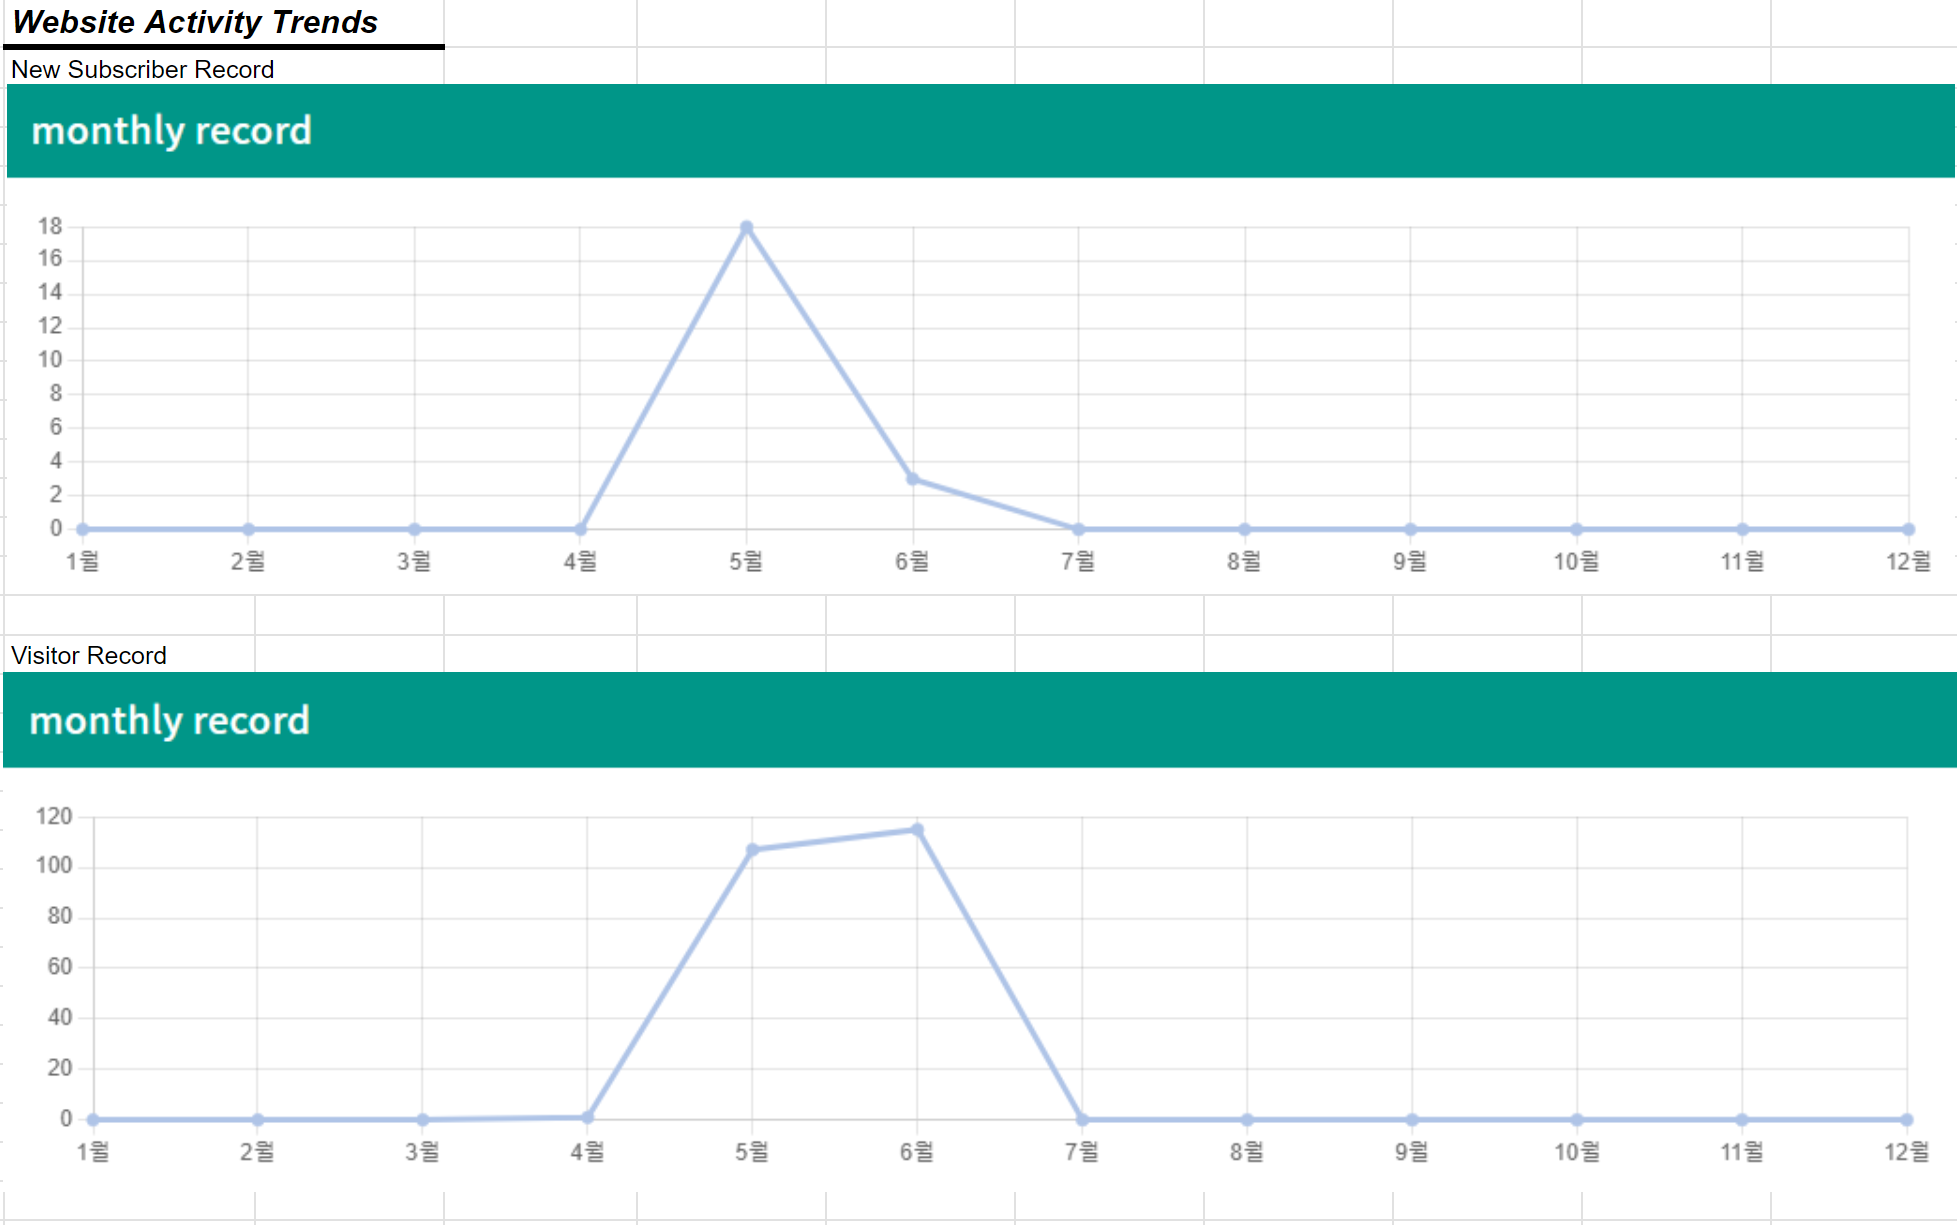

Graphs directly from Miliverse admin page

In [ ]:
# creating a df from the data sorting done in excel
Time_of_Creation = ["Acc Creation (Year/ Month)", "Username"]
Miliverse_Players_DF = Miliverse_Players_DF[Time_of_Creation]
Miliverse_Players_DF.groupby(["Acc Creation (Year/ Month)"]).count()

Acc_Creation_Data = {"Month/Year" : ["June 2022", "July 2022", "August 2022", "September 2022", "October 2022", "November 2022", "December 2022",
                                     "January 2023", "February 2023", "March 2023", "April 2023", "May 2023", "June 2023"],
                     "Num_Acc_Created" : [1, 899, 125, 148, 81, 32, 24, 286, 3, 2, 8, 17, 3]}

Acc_Creation_by_Month = pd.DataFrame(Acc_Creation_Data)
Acc_Creation_by_Month["Month/Year"] = Acc_Creation_by_Month["Month/Year"].astype(str)
Acc_Creation_by_Month

,Month/Year,Num_Acc_Created
0,June 2022,1
1,July 2022,899
2,August 2022,125
3,September 2022,148
4,October 2022,81
5,November 2022,32
6,December 2022,24
7,January 2023,286
8,February 2023,3
9,March 2023,2


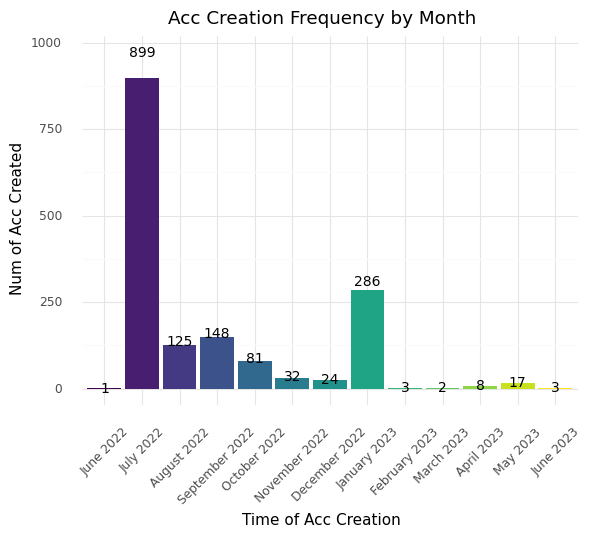

<ggplot: (8753920959347)>

In [ ]:
from plotnine import *

# Convert "Month/Year" to factor with desired order
Acc_Creation_by_Month["Month/Year"] = pd.Categorical(Acc_Creation_by_Month["Month/Year"],
                                                     categories = Acc_Creation_Data["Month/Year"],
                                                     ordered = True)

# Create the bar chart
(ggplot(Acc_Creation_by_Month, aes(x = "Month/Year", y = "Num_Acc_Created", fill = "Month/Year")) +
 geom_bar(stat = "identity") +
 geom_text(aes(label = "Num_Acc_Created"), position = position_stack(vjust = 1.08), size = 10) +
 theme_minimal() +
 labs(title ="Acc Creation Frequency by Month",
      x = "Time of Acc Creation",
      y = "Num of Acc Created") +
 theme(axis_text_x = element_text(angle = 45),
       legend_position = "none"))


From the plot above, we can see that since the creation of Miliverse, the number of accounts created is on a downwards trend. There is an initial spike upon actual release in July 2022, gathering ~900 new accounts created before dropping down to the ~100 accounts created per month. There is a smaller spike in September of 2022, after which the number of accounts creater per month drops to ~30. In January 2023, we see another large spike in account creation at ~300, but after there are little no no new accounts being created to this day.

This data shows us that the spikes in account creation are completely due to the game being presented and promoted at events. This also tells us that there isnt consistent promotion/ advertising of Miliverse to consistently generate new users. As such we need to improve marketing efforts to more than just promotion at events if we want a consistently growing comsumer base --> spikes are useful in the earlier stages of release, but we also need consistent users migrating to Miliverse for it to grow.

In [ ]:
# creating a df from the data sorting done in excel
Transaction_Creation_Data = {"Month/Year" : ["June 2022", "July 2022", "August 2022", "September 2022", "October 2022", "November 2022", "December 2022",
                                             "January 2023", "February 2023", "March 2023", "April 2023", "May 2023", "June 2023"],
                             "Num_Transactions_Created" : [0, 864, 328, 101, 42, 9, 15, 40, 4, 0, 0, 12, 15]}

Transaction_Creation_by_Month = pd.DataFrame(Transaction_Creation_Data)
Transaction_Creation_by_Month["Month/Year"] = Transaction_Creation_by_Month["Month/Year"].astype(str)
Transaction_Creation_by_Month

,Month/Year,Num_Transactions_Created
0,June 2022,0
1,July 2022,864
2,August 2022,328
3,September 2022,101
4,October 2022,42
5,November 2022,9
6,December 2022,15
7,January 2023,40
8,February 2023,4
9,March 2023,0


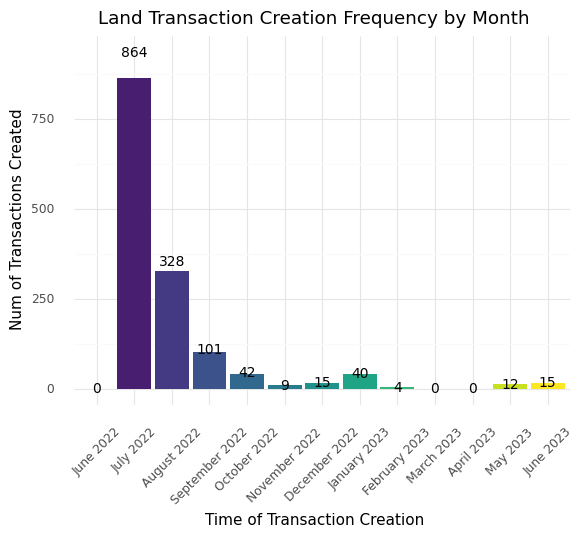

<ggplot: (8753920882698)>

In [ ]:
from plotnine import *

# Convert "Month/Year" to factor with desired order
Transaction_Creation_by_Month["Month/Year"] = pd.Categorical(Transaction_Creation_by_Month["Month/Year"],
                                                     categories = Transaction_Creation_Data["Month/Year"],
                                                     ordered = True)

# Create the bar chart
(ggplot(Transaction_Creation_by_Month, aes(x = "Month/Year", y = "Num_Transactions_Created", fill = "Month/Year")) +
 geom_bar(stat = "identity") +
 geom_text(aes(label = "Num_Transactions_Created"), position = position_stack(vjust = 1.08), size = 10) +
 theme_minimal() +
 labs(title = "Land Transaction Creation Frequency by Month",
      x = "Time of Transaction Creation",
      y = "Num of Transactions Created") +
 theme(axis_text_x = element_text(angle = 45),
       legend_position = "none"))


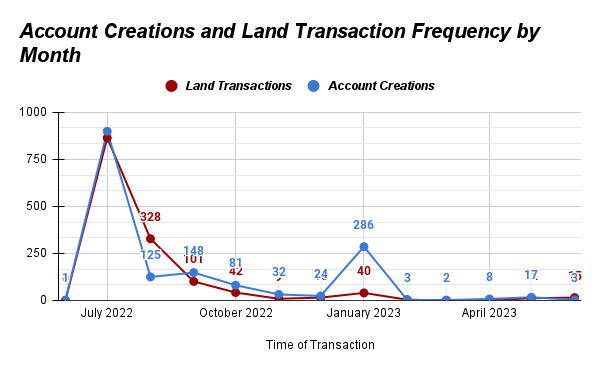

Land Transactions are one of the primary metrics to look at in Miliverse as it is one of the first activities a user will take part in. Looking at the graph above, we cn see a similar trend to the acc creation chart earlier. This tells us that while the values are not necessarily as high as we would want (we would assume the number of transaction to always be greater than or equal to the number of users --> higher than the number of new users). However, we can see the respective months have lower number of land transactions.

This data shows us that users are creating accounts, but neither existing nor new users are actively playing the game. This means that we need to look into the game functions and mechanics to improve user engagement and have them want to continue playing the game after creating an account. This could come in the following forms:
- other in game mechanics
- login incentives
- time based incentives
- end goal to work towards

## Summary & Additional Visualization

In [ ]:
# creating a subset df with the buyer and number of tiles
Active_Land_Transacters = ["Buyer", "Num Tiles"]
Players_with_Land_Transactions = Miliverse_Land_DF[Active_Land_Transacters]
Players_with_Land_Transactions.groupby(["Buyer"]).count()

,Num Tiles
Buyer,
",Pastel open_in_new",2
006 open_in_new,369
0재 open_in_new,4
1004 open_in_new,2
1720sujin open_in_new,2
...,...
테니스 open_in_new,2
하늘의절반 open_in_new,26
하동우 open_in_new,2


In [ ]:
# creating a subset df of buyers and the number of weapons
Active_Weapon_Transacters = ["Buyer", "Num Weapons"]
Players_with_Weapon_Transactions = Miliverse_Weapons_DF[Active_Weapon_Transacters]
Players_with_Weapon_Transactions.groupby(["Buyer"]).count()

,Num Weapons
Buyer,
006 open_in_new,5
5metasea open_in_new,1
Chevi open_in_new,4
DankPackMule open_in_new,4
Deathfyre open_in_new,2
EVA.M open_in_new,17
His open_in_new,1
MS open_in_new,2
Me open_in_new,1


1647 players --> 1629 after dropping accounts that did not have an email

1430 land transactions

257 players make up all land transactions

165 weapon transactions

21 players make up all weapon transactions


In [ ]:
# creating a df to hold all the summary data(counts of each metric)
Miliverse_Base_Summary_Data = {"Metrics" : ["Total Player Base", "Total Land Transactions", "Num Players with Land Transactions",
                                            "Total Weapon Transactions", "Num Players with Weapon Transactions"],
                               "Values" : [1629, 1430, 257, 165, 21]}

Miliverse_Summary = pd.DataFrame(Miliverse_Base_Summary_Data)
Miliverse_Summary["Metrics"] = Miliverse_Summary["Metrics"].astype(str)
Miliverse_Summary

,Metrics,Values
0,Total Player Base,1629
1,Total Land Transactions,1430
2,Num Players with Land Transactions,257
3,Total Weapon Transactions,165
4,Num Players with Weapon Transactions,21


### Visualization of Summary Data + Findings

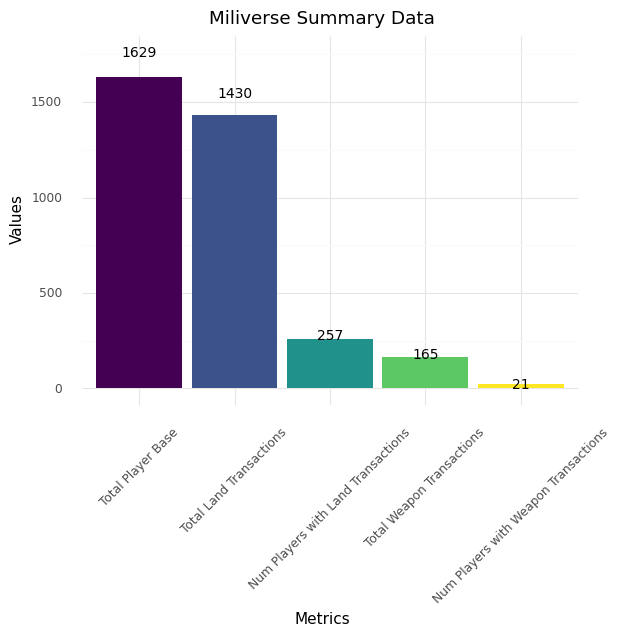

<ggplot: (8753995847242)>

In [ ]:
from plotnine import *

# Convert "Metrics" to factor with desired order
Miliverse_Summary["Metrics"] = pd.Categorical(Miliverse_Summary["Metrics"],
                                              categories = Miliverse_Summary["Metrics"],
                                              ordered = True)

# Create the bar chart
(ggplot(Miliverse_Summary, aes(x = "Metrics", y = "Values", fill = "Metrics")) +
 geom_bar(stat = "identity") +
 geom_text(aes(label = "Values"), position = position_stack(vjust = 1.08), size = 10) +
 theme_minimal() +
 labs(title ="Miliverse Summary Data",
      x = "Metrics",
      y ="Values") +
 theme(axis_text_x = element_text(angle = 45),
       legend_position = "none"))

The chart above tells us a good amount of key information regarding Miliverse.

When we look at the total player base (1629) and compare it to the total number of land transactions (1430) we are tricked into thinking that we have high user engagement, when in reality, only 257 users are responsible for the 1430 transactions. This tells us that while we have a high player base, we lack user engagement to where new users arent even making the most basic actions on the platform. This further supports the information on the comparison between the account creation and land transaction charts.

Weapon transactions are the way for users to become more involved in the game as they start to care more about their "score" in game. They purchase land, and for military power, also purchase weapons, troops etc. While the game currently has 1430 land transactions, there are only 165 weapon transactions. This number is already staggeringly low, but when we consider that onyl 21 players are responsible for those 165 transactions, it further supports the points mentioned before regarding user engagement.

After taking a look at the accounts of a random sample of 10 users, there are more issues that should be addressed quickly. When users create an account, they recieve no milipoints (Miliverse currency). From a game standpoint,  users have no reason to be on the platform if they do not have any in-game currency, as they cannot experience any aspect of the game. With this, the only actual users of the game are those that recieved milipoints from attending the events and promotions hosted. Further analysis needs to be done on that specific group to understand if the metrics differ by a significant amount, or if all 257 users who have made transactions recieved a significant amount of milipoints from attending an event.

There are currently 4 issues that need to be addressed

Needs to be addressed prior to the next event promoting the web-game platform

- As brought up by Kent before, the price for land and weapons needs to be decreased --> this would allow users to be able to think more strategically about the milipoints they have recieved, and be able to do more with less + incentivise purchases for those who are willing to do so
- All users upon creating an account recieve some number of milipoints
- Implement login based rewards (ex: enough milipoints to buy 2 tiles) where they have to be on the app for ~30 min and resets on world time every 24 hrs --> need to ensure that they cannot just change time/ time zone and game the system [this should also be implemented before next promotional event but the 2 above are top priority]

Should be addressed whenever possible
- There needs to be some element of gameplay to engage user interactions. Currently there is just the marketplace and the buying of and and weapons from the dev account
  - Some ideas that the nterns have brought up:
    - simulation fight against an AI that has the military power of certain generals and their armies
    - simulation based fight against other users that just takes in land size, military power, and some expertise into account
    - with these the user can get rewards of milipoints, weapons, and increase to expertise stat
- these gameplay aspects do not take away from the "no starting war/ violence" message and takes on a more historical approach looking at the military strength of weapons and compares it to some of the notable armies throughout history




## Clustering

In [ ]:
Miliverse_Active_Players_DF

In [ ]:
# returning the names of the columns in the df
Miliverse_Active_Players_DF.columns

Index(['index', 'Buyer', 'Email', 'Time of Acc Creation',
       'Time of Transaction', 'Acc Creation (Year/ Month)',
       'Acc Creation (float)',
       'Time of  Most Recent Transaction (year/ month)',
       'Time of  Most Recent Transaction (float)', 'Num Tiles Held',
       'Milipoints Held', 'Num Transactions'],
      dtype='object')

### Initial Scatterplots

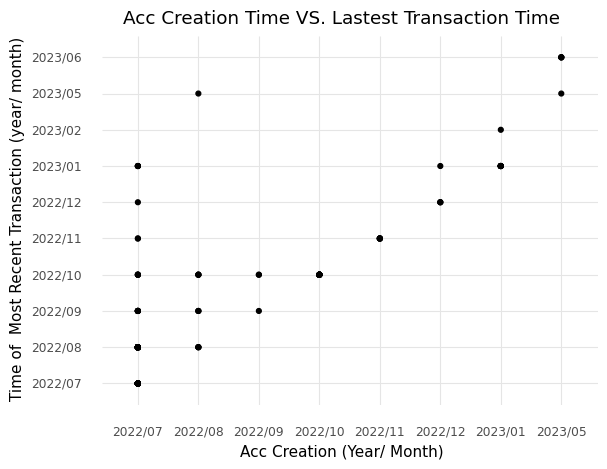

In [ ]:
# creating scatterplot to show relationship between acc creation date and most recent transaction
print(ggplot(Miliverse_Active_Players_DF, aes(x = 'Acc Creation (Year/ Month)', y = 'Time of  Most Recent Transaction (year/ month)')) + geom_point() +
        theme_minimal() + labs(title = "Acc Creation Time VS. Lastest Transaction Time"))

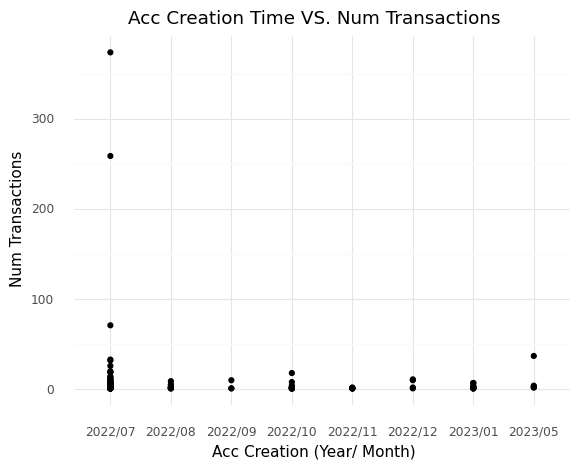

In [ ]:
# creating scatterplot to show relationship between acc creation date and the num of transactions
print(ggplot(Miliverse_Active_Players_DF, aes(x = 'Acc Creation (Year/ Month)', y = 'Num Transactions')) + geom_point() +
        theme_minimal() + labs(title = "Acc Creation Time VS. Num Transactions"))

### Hierarchical Agglomerative Model

In [ ]:
# code to setup vars for a hac model
features = ['Acc Creation (float)', 'Time of  Most Recent Transaction (float)', 'Num Tiles Held', 'Milipoints Held', 'Num Transactions']
cont = ['Num Tiles Held', 'Milipoints Held', 'Num Transactions']

X = Miliverse_Active_Players_DF[features]

z = StandardScaler()
X[cont] = z.fit_transform(X[cont])

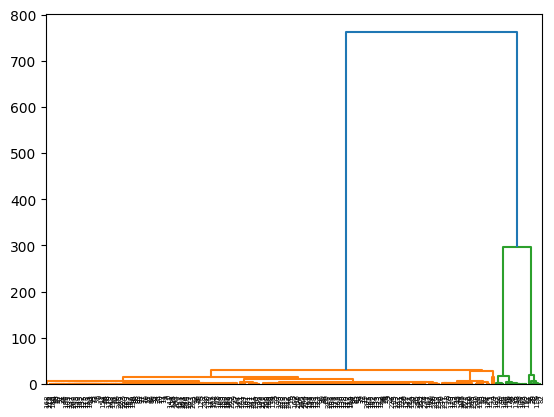

In [ ]:
# dendrogram to determine num clusters
dendro = sch.dendrogram(sch.linkage(X[features], method='ward'))

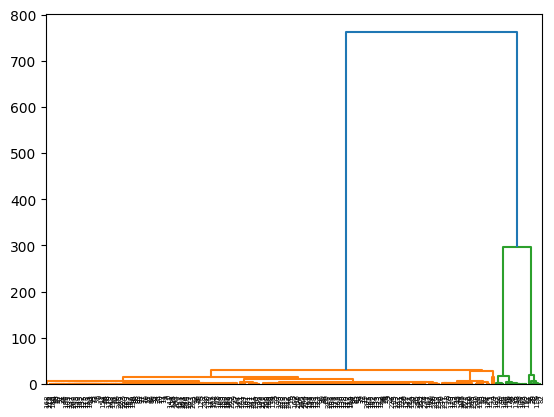

In [ ]:
# create Agglomerative Clustering model
hac = AgglomerativeClustering(n_clusters = 3,
                                affinity = "euclidean",       # choosing the affinity of "euclidean" --> continuous data
                                linkage = "ward")             # choosing the linkage of "ward" --> typically the default

# fitting the model and building a dendrogram
hac.fit(X)
dendro = sch.dendrogram(sch.linkage(X[features], method='ward'))

# grabbing the cluster labels for each point
membership = hac.labels_
X["Cluster2"] = membership

In [ ]:
# calculating silhouette score
silhouette_score(X, membership)

0.9774014039593412

In [ ]:
# assigning a column in the df with hac cluster assignments
Miliverse_Active_Players_DF["Cluster_2"] = X["Cluster2"]
Miliverse_Active_Players_DF

### Gaussian Model

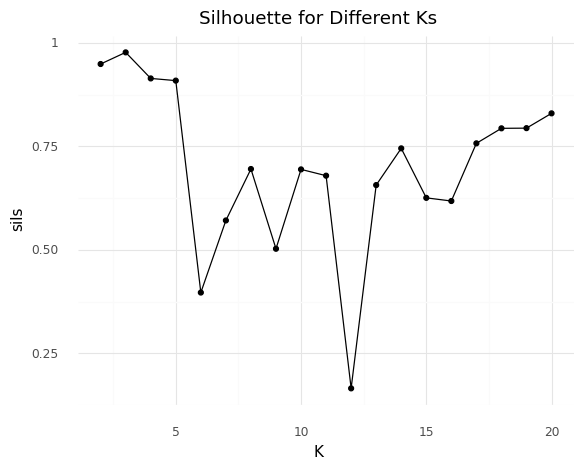

In [ ]:
# code to create a model for different values of k, and output a ggplot of the different silhouete scores for diff values of k
features = ['Acc Creation (float)', 'Time of  Most Recent Transaction (float)', 'Num Tiles Held', 'Milipoints Held', 'Num Transactions']
cont = ['Num Tiles Held', 'Milipoints Held', 'Num Transactions']

X = Miliverse_Active_Players_DF[features]

z = StandardScaler()
X[cont] = z.fit_transform(X[cont])

ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sils = []

for k in ks:
    gmm = GaussianMixture(n_components = k)
    gmm.fit(X[features])

    sils.append(silhouette_score(X[features], gmm.predict(X[features])))

sil_df = pd.DataFrame({"K": ks,
                    "silhouette": sils})

print(ggplot(sil_df, aes(x = "K", y = "sils")) + geom_point() +
geom_line() +
theme_minimal() +
labs(title = "Silhouette for Different Ks"))

In [ ]:
# creating the model with 3 clusters
features = ['Acc Creation (float)', 'Time of  Most Recent Transaction (float)', 'Num Tiles Held', 'Milipoints Held', 'Num Transactions']
cont = ['Num Tiles Held', 'Milipoints Held', 'Num Transactions']

X = Miliverse_Active_Players_DF[features]

z = StandardScaler()
X[cont] = z.fit_transform(X[cont])

gmm2 = GaussianMixture(n_components = 3)
gmm2.fit(X[features])

cluster = gmm2.predict(X[features])
cluster

silhouette_score(X[features], cluster)

gmm2.predict_proba(X[features])

X["cluster"] = cluster

In [ ]:
# assigning a column in the df with the gmm cluster assignments
Miliverse_Active_Players_DF["Cluster"] = X["cluster"]
Miliverse_Active_Players_DF

### Scatterplots with Cluster Assignments

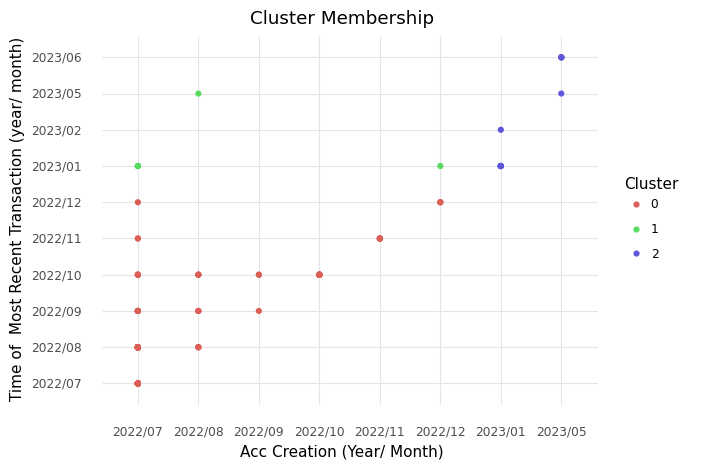

In [ ]:
# recreating the old scatterplots but colored with cluster assignments
print(ggplot(Miliverse_Active_Players_DF, aes(x = 'Acc Creation (Year/ Month)', y = 'Time of  Most Recent Transaction (year/ month)', color = "factor(Cluster_2)")) +
    geom_point() +
    theme_minimal() +
    labs(title = "Cluster Membership") +
    scale_color_discrete(name ="Cluster"))


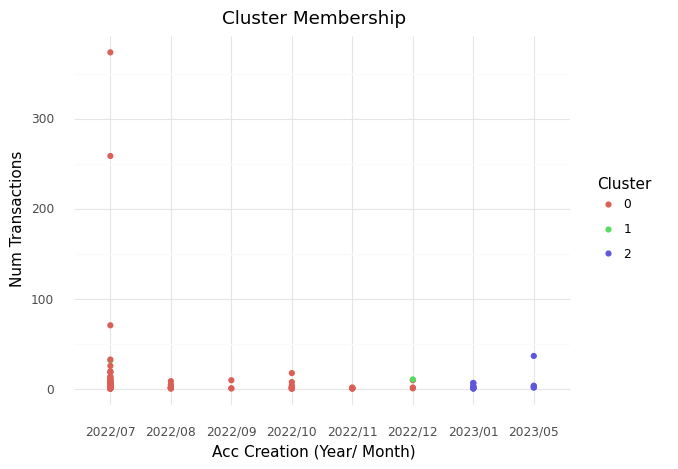

In [ ]:
# recreating the old scatterplots but colored with cluster assignments
print(ggplot(Miliverse_Active_Players_DF, aes(x = 'Acc Creation (Year/ Month)', y = 'Num Transactions', color = "factor(Cluster_2)")) +
    geom_point() +
    theme_minimal() +
    labs(title = "Cluster Membership") +
    scale_color_discrete(name ="Cluster"))

### Within Cluster Analysis

In [ ]:
# returning a df of summary stats of each cluster
clustered_DF = Miliverse_Active_Players_DF.groupby(["Cluster_2"])['Acc Creation (float)', 'Time of  Most Recent Transaction (float)', 'Num Tiles Held', 'Milipoints Held', 'Num Transactions'].mean()
clustered_DF

,Acc Creation (float),Time of Most Recent Transaction (float),Num Tiles Held,Milipoints Held,Num Transactions
Cluster_2,,,,,
0,202207.426087,202208.017391,1692.691304,7.132336e+06,6.247826
1,202207.857143,202301.571429,1509.000000,2.935589e+08,9.714286
2,202302.176471,202302.470588,156.705882,5.083990e+07,4.764706


In [ ]:
# creating subset df of cluster 0
cluster_0 = Miliverse_Active_Players_DF[Miliverse_Active_Players_DF["Cluster_2"] == 0]
cluster_0

In [ ]:
# dropping outliers
cluster_0.drop(cluster_0[cluster_0['Email'] == "lm.miliverse@gmail.com"].index, inplace = True)
cluster_0.drop(cluster_0[cluster_0['Email'] == "event.miliverse@gmail.com"].index, inplace = True)
cluster_0.drop(cluster_0[cluster_0['Email'] == "parksiho@gmail.com"].index, inplace = True)
cluster_0.drop(cluster_0[cluster_0['Email'] == "youngjeon@gmail.com"].index, inplace = True)
cluster_0.drop(cluster_0[cluster_0['Email'] == "jiyunkim1021@gmail.com"].index, inplace = True)
cluster_0.drop(cluster_0[cluster_0['Email'] == "kimhs7466@gmail.com"].index, inplace = True)
cluster_0.drop(cluster_0[cluster_0['Email'] == "parksihio@gmail.com"].index, inplace = True)
cluster_0 = cluster_0.reset_index()

In [ ]:
cluster_0.describe()

,level_0,index,Acc Creation (float),Time of Most Recent Transaction (float),Num Tiles Held,Milipoints Held,Num Transactions,Cluster_2,Cluster
count,223.000000,223.000000,223.000000,223.000000,223.000000,2.230000e+02,223.000000,223.0,223.0
mean,129.291480,129.820628,202207.430493,202208.004484,181.242152,6.230253e+05,3.511211,0.0,0.0
std,73.989409,74.501854,1.116366,1.228409,1460.407695,6.357118e+06,6.054453,0.0,0.0
min,0.000000,0.000000,202207.000000,202207.000000,0.000000,0.000000e+00,1.000000,0.0,0.0
25%,66.500000,66.500000,202207.000000,202207.000000,1.000000,1.000000e+04,2.000000,0.0,0.0
50%,130.000000,130.000000,202207.000000,202208.000000,2.000000,2.000000e+04,2.000000,0.0,0.0
75%,194.500000,195.500000,202207.000000,202208.000000,2.000000,4.000000e+04,2.000000,0.0,0.0
max,253.000000,255.000000,202212.000000,202212.000000,15000.000000,9.349000e+07,71.000000,0.0,0.0


In [ ]:
# creating subset df of cluster 1
cluster_1 = Miliverse_Active_Players_DF[Miliverse_Active_Players_DF["Cluster_2"] == 1]
cluster_1

In [ ]:
# dropping outliers
cluster_1.drop(cluster_1[cluster_1['Email'] == "carolha@kakao.com"].index, inplace = True)
cluster_1.drop(cluster_1[cluster_1['Email'] == "demiha7@gmail.com"].index, inplace = True)
cluster_1.drop(cluster_1[cluster_1['Email'] == "donaldazer@gmail.com"].index, inplace = True)
cluster_1 = cluster_1.reset_index()

In [ ]:
cluster_1.describe()

,level_0,index,Acc Creation (float),Time of Most Recent Transaction (float),Num Tiles Held,Milipoints Held,Num Transactions,Cluster_2,Cluster
count,4.000000,4.000000,4.0,4.0,4.000000,4.000000,4.000000,4.0,4.0
mean,75.250000,75.250000,202207.0,202301.0,11.250000,2545.000000,5.000000,1.0,2.0
std,47.338321,47.338321,0.0,0.0,11.870833,2942.804785,1.825742,0.0,0.0
min,7.000000,7.000000,202207.0,202301.0,4.000000,0.000000,3.000000,1.0,2.0
25%,63.250000,63.250000,202207.0,202301.0,5.500000,0.000000,3.750000,1.0,2.0
50%,90.000000,90.000000,202207.0,202301.0,6.000000,2450.000000,5.000000,1.0,2.0
75%,102.000000,102.000000,202207.0,202301.0,11.750000,4995.000000,6.250000,1.0,2.0
max,114.000000,114.000000,202207.0,202301.0,29.000000,5280.000000,7.000000,1.0,2.0


In [ ]:
# creating subset df of cluster 2
cluster_2 = Miliverse_Active_Players_DF[Miliverse_Active_Players_DF["Cluster_2"] == 2]
cluster_2

In [ ]:
# dropping outliers
cluster_2.drop(cluster_2[cluster_2['Email'] == "hwj0072@gmail.com"].index, inplace = True)
cluster_2.drop(cluster_2[cluster_2['Email'] == "dylan@maxwelldesigngroup.com"].index, inplace = True)
cluster_2.drop(cluster_2[cluster_2['Email'] == "overpowerdgorilla100@gmail.com"].index, inplace = True)
cluster_2.drop(cluster_2[cluster_2['Email'] == "mixleno@gmail.com"].index, inplace = True)
cluster_2.drop(cluster_2[cluster_2['Email'] == "innodesignceo@gmail.com"].index, inplace = True)
cluster_2.drop(cluster_2[cluster_2['Email'] == "thomowoodedway@gmail.com"].index, inplace = True)
cluster_2 = cluster_2.reset_index()

In [ ]:
cluster_2.describe()

,level_0,index,Acc Creation (float),Time of Most Recent Transaction (float),Num Tiles Held,Milipoints Held,Num Transactions,Cluster_2,Cluster
count,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.0,11.0
mean,98.272727,98.636364,202302.818182,202303.272727,227.272727,1.501985e+07,6.272727,2.0,1.0
std,65.531810,65.991322,2.088932,2.453198,317.896238,2.832695e+07,10.422005,0.0,0.0
min,18.000000,18.000000,202301.000000,202301.000000,2.000000,1.593800e+05,1.000000,2.0,1.0
25%,40.500000,40.500000,202301.000000,202301.000000,15.000000,4.245070e+06,1.500000,2.0,1.0
50%,89.000000,89.000000,202301.000000,202302.000000,51.000000,9.180000e+06,3.000000,2.0,1.0
75%,157.500000,158.500000,202305.000000,202306.000000,345.000000,9.910000e+06,5.500000,2.0,1.0
max,192.000000,193.000000,202305.000000,202306.000000,896.000000,9.969978e+07,37.000000,2.0,1.0


### Summary Statistics (Including Outliers)

Cluster 0:

- 230 Users

- Acc Creation between July 2022 and December 2022

- On avg have ~1690 tiles

- On avg have ~7,130,000 milipoints

- On avg each have ~7 transactions

- Outliers: 006, EVA, Siho, solarceo, 도미니, 보리맘, 쇼박 --> have an inordinate amount of tiles and/ or milipoints

- Without these outliers the stats are a lot lower as this cluster encompasses the avg players, but because of the num transactions, acc creation time, and transaction time being in the same area, they are grouped together

Cluster 1:

- 7 Users

- Acc Creation between July 2022 and December 2022

- On avg have ~1510 tiles

- On avg have ~294,000,000 milipoints

- On avg each have ~10 transactions

- Outliers: carolha, demiha, ducky  --> have an inordinate amount of milipoints/ tiles

- Without these outliers the stats are a lot higher as this cluster encompasses the more active players who had a lot of milipoints, and spent a good amount as well, but because of the num transactions, acc creation time, and transaction time being in the same area, they are grouped together

Cluster 2:

- 17 Users

- Acc Creation between January 2023 and May 2023

- On avg have ~160 tiles

- On avg have ~51,000,000 milipoints

- On avg each have ~5 transactions

- Outliers: deemax, Kain, kiltrek, OpElijah21 --> have 0 milipoints and only ~20 tiles; Paloaltodesigner and Tomo have an inordinatly high number of milipoints and tiles

- Without these outliers the stats are a lot lower as this cluster encompasses the players with little money and few transactions, but because of the num transactions, acc creation time, and transaction time being in the same area, they are grouped together

### True Summary Statistics (No Outliers)

Cluster 0:

- 223 Users

- Acc Creation between July 2022 and December 2022

- On avg have ~182 tiles

- On avg have ~623,000 milipoints

- On avg each have ~4 transactions

- Without the outliers these are the stats


Cluster 1:

- 4 Users

- Acc Creation between July 2022 and December 2022

- On avg have ~12 tiles

- On avg have ~2550 milipoints

- On avg each have ~5 transactions

- Without the outliers these are the stats


Cluster 2:

- 11 Users

- Acc Creation between Jauary 2023 and May 2023

- On avg have ~230 tiles

- On avg have ~15,000,000 milipoints

- On avg each have ~7 transactions

- Without the outliers these are the stats



In [ ]:
# creating a df of all the compiled cluster analysis info
Miliverse_Cluster_Summary_Statistics = {"Cluster" : [0, 1, 2],
                                        "Members" : [223, 4, 11],
                                        "Min Acc Creation (Month/ Year)" : ["07/ 2022", "07/ 2022", "01/ 2023"],
                                        "Max Acc Creation (Month/ Year)" : ["12/ 2022", "12/ 2022", "05/ 2023" ],
                                        "Min Most Recent Transaction (Month/ Year)" : ["07/ 2022", "01/ 2023", "01/ 2023"],
                                        "Max Most Recent Transaction (Month/ Year)" : ["12/ 2022", "05/ 2023", "06/ 2023"],
                                        "Avg Num Tiles Held" : [182, 12, 230],
                                        "Avg Milipoints Held" : [623000, 2550, 15000000],
                                        "Avg Num Transactions" : [4, 5, 7]}

Miliverse_Cluster_Summary_Statistics_DF = pd.DataFrame(Miliverse_Cluster_Summary_Statistics)
Miliverse_Cluster_Summary_Statistics_DF

,Cluster,Members,Min Acc Creation (Month/ Year),Max Acc Creation (Month/ Year),Min Most Recent Transaction (Month/ Year),Max Most Recent Transaction (Month/ Year),Avg Num Tiles Held,Avg Milipoints Held,Avg Num Transactions
0,0,223,07/ 2022,12/ 2022,07/ 2022,12/ 2022,182,623000,4
1,1,4,07/ 2022,12/ 2022,01/ 2023,05/ 2023,12,2550,5
2,2,11,01/ 2023,05/ 2023,01/ 2023,06/ 2023,230,15000000,7


The clustering model paints an interesting picture about the userbase that Miliverse has.

In the first cluster we see the majority of Miliverse users. In this cluster the everage user holds ~181 tles and ~623,000 milipoints. Furthermore, they each have ~4 transaction on average. Considering that the game is not fully fleshed out in its functionality and gameplay, these are positive numbers to have, because it means that the avg active player is contributing to the game via transactions.

In the second cluster we see the "inactive" active players, or those who did not have many milipoints to work with. They hold ~12 tiles and ~2,550 milipoints. They also have ~5 transactions but the low tile count tells us that they never had that many milipoints.

In the last cluster we can see a smaller part of the Miliverse player base. These users are more wealthy in the game, as they hold ~230 tiles, as well as ~15,000,000 milipoints. These players are more active than those in cluster 0, and also have a lot of milipoints. Since these are also more recent players, there is more engagement from this group as well.



While there isnt as much data as I would like to consider when developing a custering model, the data provides us with some interesting findings regarding the player base. To begin with, we want the average player to be in cluster 2; Users have enough milipoints, buy many tiles, and contribute to the game. We would want cluster 0 to consist of very new players who haven't been around long enough to have that many milipoints, but are still participating in the aspects of the game. Ideally, cluster 1 should not exist, and as users recieve milipoints, I do not believe that the cluster will continue to exist.

The overall goal for Mliverse is to develop a player base that on average has a strong number of milipoints and continues to recieve them through login/ active rewards to continue participating in the aspects of the game.

I think that a good strategy for Miliverse is to do the following:

- Keep the land and weapon pricing the same

- New users start the gamewith 10 million milipoints

- Implement login rewards of 10,000 milipoints per day, and 50,000 if they login for the 7 days of the week

- Flesh out the gameplay aspects as mentioned in the introductory statistics section

- Keep the real money to milipoints conversion such that 10 or 50 cents is equal to 10,000 milipoints

- Incentivise users to participate in gameplay aspects with recieving milipoints, weapons, and NFTs for achievements/ irl events

## Misc Visualization

In [ ]:
# creating a df of data sorting done in excel
Miliverse_Login_Email_Frequency = {"Login Method" : ["Gmail", "Naver", "Hanmail/ Daum", "Kakao", "Other"],
                                    "Frequency" : [140, 62, 26, 9, 19]}

Miliverse_Login_Email_Frequency_DF = pd.DataFrame(Miliverse_Login_Email_Frequency)
Miliverse_Login_Email_Frequency_DF

,Login Method,Frequency
0,Gmail,140
1,Naver,62
2,Hanmail/ Daum,26
3,Kakao,9
4,Other,19


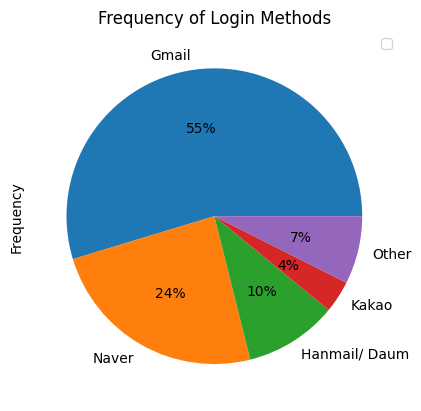

In [ ]:
# creaating a pie chart with email frequency
Miliverse_Login_Email_Frequency_DF.plot(kind = 'pie',
                                        y = 'Frequency',
                                        labels = Miliverse_Login_Email_Frequency_DF["Login Method"],
                                        autopct = '%1.0f%%',
                                        title = 'Frequency of Login Methods')
plt.legend('')


The pie chart shows us the most common emails used to register for Miliverse accounts. In order from most to least common, we have: Gmail, Naver, Hanmail/ Daum and Kakao.

Gmail users usually hint towards US based players, and looking at usernames this holds up, as many of the names are in english and consisnt of english words. Gmail is also somewhat common in Korea because of Samsung phone use, so they most likely make up a decent percentage of the gmail users as well

Since we don't currently have location data, we can make some assumptions from this. We can see that the majority of the playerbase comes from the US and Korea, which is also supported by the locations where Miliverse has been promotied, and the means by which it has done so.
